<a href="https://colab.research.google.com/github/bipulsimkhada/ML-Regression/blob/main/California_Housing_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# California Housing using Regression

## Importing the libraries

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [51]:
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
X = dataset.data
y = dataset.target

## Dataset Info

In [52]:
# Feature list
dataset.feature_names 

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [53]:
# printing first 5 feature data of the dataset
caliHousing_DataFrame = pd.DataFrame(dataset.data, columns=dataset.feature_names)
print(caliHousing_DataFrame.head()) 

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [54]:
#Describing dataset
caliHousing_DataFrame.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [55]:
#Checking if there is any missing data.
caliHousing_DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


## Data Visualization

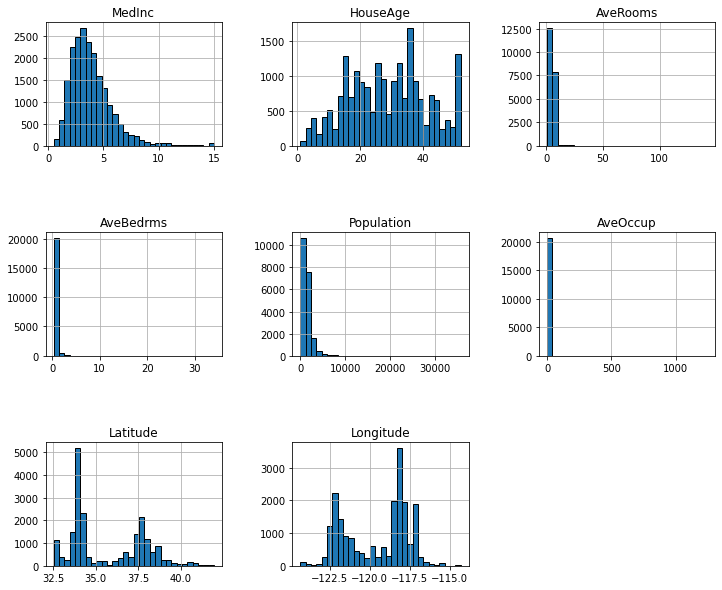

In [56]:
caliHousing_DataFrame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

## Splitting the dataset into the Training set and Test set

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Multiple Linear Regression model

In [58]:
#Training multiple linear regression model
from sklearn.linear_model import LinearRegression
regressor_mul = LinearRegression()
regressor_mul.fit(X_train, y_train)

LinearRegression()

In [59]:
# evaluating model performance with R square
y_pred_mul = regressor_mul.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test, y_pred_mul)

0.5943232652466175

## Support Vector Regression model

In [60]:
#reshaping y
y_train_srv = y_train.reshape(len(y_train),1)
y_test_srv = y_test.reshape(len(y_test),1)

In [61]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_sc = sc_X.fit_transform(X_train)
y_train_sc = sc_y.fit_transform(y_train_srv)

In [62]:
#Training Support Vector Regression model
from sklearn.svm import SVR
regressor_svr = SVR(kernel = 'rbf')
regressor_svr.fit(X_train_sc, y_train_sc)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [63]:
# evaluating model performance with R square
y_pred_svr = sc_y.inverse_transform(regressor_svr.predict(sc_X.transform(X_test)).reshape(-1,1))

from sklearn.metrics import r2_score
r2_score(y_test_srv, y_pred_svr)

0.7485751571571271

## Decision Tree Regression model

In [64]:
#Training Decision Tree regression model
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor(random_state = 0)
regressor_dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [65]:
# evaluating model performance with R square
y_pred_mul = regressor_dt.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test, y_pred_mul)

0.5924304824636766

## Random Forest Regression model

In [66]:
#Training Random Forest regression model
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 15, random_state = 0)
regressor_rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=15, random_state=0)

In [67]:
# evaluating model performance with R square
y_pred_mul = regressor_rf.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test, y_pred_mul)

0.7942326953247951